In [206]:
import pandas as pd
from IPython.display import display
import numpy as np
import re
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


In [278]:
df = pd.read_csv("unified_annotations.csv",sep=",",index_col=0)
df = df[df.columns.drop(list(df.filter(regex='Comments')))].T
#df = df.iloc[:-1,:]
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
display(df)

Title,Link,Paper notes,Language,Model(s),Code available?,Comments,Prompt task,Sequence Scoring,Comments,Single word generation,...,Most probable option or N options,Comments,Difference in output distributions,Comments,Difference in toxicity,Comments,Difference in sentiment,Comments,Difference in regard,Comments
Unpacking the Interdependent Systems of Discrimination: Ableist Bias in NLP Systems through an Intersectional Lens,https://aclanthology.org/2021.findings-emnlp.2...,"based on (hutchinson et al., 2020) and kurita ...",en,bert-base-uncased,yes,"code is not available but test data is, and co...",NaN,no,NaN,yes,...,no,NaN,no,NaN,no,NaN,yes,use google cloud sentiment analyser,no,NaN
Universal Adversarial Triggers for Attacking and Analyzing NLP,https://aclanthology.org/d19-1221.pdf,NaN,en,gpt-2 (117m params) and 345m params,yes,https://github.com/eric-wallace/universal-trig...,NaN,no,NaN,no,...,no,NaN,no,NaN,yes,NaN,no,NaN,no,NaN
CrowS-Pairs: A Challenge Dataset for Measuring Social Biases in Masked Language Models,https://aclanthology.org/2020.emnlp-main.154.pdf,introduces a new benchmark dataset (subsequent...,en,"bert-base, roberta-large, albertxxl-v2",yes,https://github.com/nyu-mll/crows-pairs/,NaN,yes,NaN,no,...,no,NaN,no,NaN,no,NaN,no,NaN,no,NaN
“You are grounded!”: Latent Name Artifacts in Pre-trained Language Models,https://aclanthology.org/2020.emnlp-main.556.pdf,NaN,en,"bert, roberta, gpt, gpt2, xlnet, transformerxl",yes,https://github.com/vered1986/lm_ne_bias,NaN,no,NaN,no,...,no,NaN,yes,50 sample endings for each template,no,NaN,yes,NaN,no,NaN
Queens are Powerful too: Mitigating Gender Bias in Dialogue Generation,https://aclanthology.org/2020.emnlp-main.656.pdf,NaN,en,transformer encoder-decoder (i think bert) bas...,yes,https://parl.ai/projects/genderation_bias/ tho...,NaN,no,NaN,no,...,no,NaN,yes,not explicit but seems so: generate one senten...,yes,"look at generic ""offensiveness"" of output",no,NaN,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Quantifying Gender Bias Towards Politicians in Cross-Lingual Language Models,https://arxiv.org/abs/2104.07505,NaN,"arabic, chinese, english, french, hindi, russi...",cross-lingual masked language models,no,NaN,NaN,no,NaN,yes,...,yes,NaN,no,NaN,no,NaN,yes,relative frequency of positive vs. negative se...,no,NaN
Theory-Grounded Measurement of U.S. Social Stereotypes in English Language Models,https://aclanthology.org/2022.naacl-main.92/,measures correlations of different demographic...,english,bert and roberta,yes,https://github.com/tristacao/u.s_stereotypes.,NaN,yes,"ilps (template based, following kurita et al. ...",no,...,no,NaN,no,NaN,no,NaN,no,NaN,no,NaN
StereoSet: Measuring stereotypical bias in pretrained language models,https://aclanthology.org/2021.acl-long.416.pdf,NaN,english,"bert, gpt2, roberta, and xlnet",yes,https://stereoset.mit.edu/,NaN,yes,log probability for an attribute term to fill ...,no,...,no,NaN,no,NaN,no,NaN,no,NaN,no,NaN
Towards WinoQueer: Developing a Benchmark for Anti-Queer Bias in Large Language Models,https://arxiv.org/abs/2206.11484,modelled after crows-pairs and winogender,english,"bert-base, bert-large, spanbert-base, spanbert...",yes,https://github.com/katyfelkner/winoqueer,NaN,yes,comparison of log probability of stereotypical...,no,...,no,NaN,no,NaN,no,NaN,no,NaN,no,NaN


In [208]:
total_annotations = len(df)

In [209]:
df.Language.str.count("English").sum() + df.Language.str.count(r"\ben\b").sum()
df.Language.value_counts()

english                                                                         53
en                                                                              21
multilingual model but tested in only english                                    2
it, fr, es, pt, ro, en                                                           1
sudanese                                                                         1
en, ru, ja + de, ar, es, pt, indonesian, zh                                      1
cn                                                                               1
english, german, spanish, korean,\nturkish, and chinese                          1
english, french, arabic                                                          1
english, chinese                                                                 1
french (also validates findings in english)                                      1
english, bangla (only testing for language bias, not bias in bangla outputs)     1
dutc

In [210]:
all_models = df["Model(s)"].values

In [211]:
bert, gpt, neither, fail = 0, 0, 0, 0
total = len(all_models)
for entry in all_models:
    try:
        text = entry.lower()
    except:
        print(entry) # mostly nans
        fail += 1
        continue
    if "bert" not in text and "gpt" not in text:
        neither += 1
        continue
    if "bert" in text:
        bert += 1
    if "gpt" in text:
        gpt += 1

nan
nan


In [212]:
print(f"Bert: {bert} GPT: {gpt} Neither: {neither} Total: {total-fail}")

Bert: 43 GPT: 42 Neither: 11 Total: 88


In [165]:
model_counts = []
for entry in all_models:
    if type(entry) != str:
        continue
    text = re.sub(" and ", ",", entry)
    text = re.sub(",,", ",", text)
    models = text.split(',')
    model_counts.append(len(models))

<AxesSubplot: ylabel='Count'>

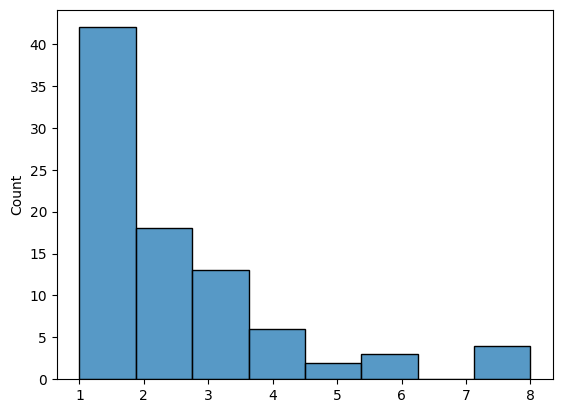

In [213]:
sns.histplot(data=model_counts)

In [214]:
df["Code available?"].str.count("yes").sum()

48.0

In [291]:
t = df["Gender Scope"].value_counts().items()

In [292]:
scope_df = pd.DataFrame.from_records(t, columns=["gender_scope", "count"])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'binary only'),
  Text(1, 0, 'binary+ack'),
  Text(2, 0, 'binary+other'),
  Text(3, 0, 'other only')])

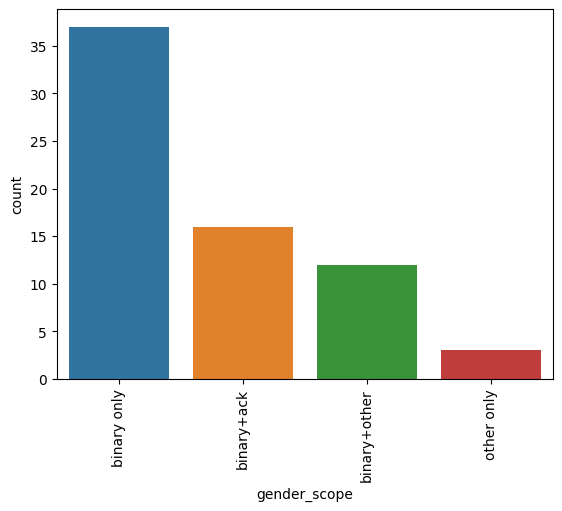

In [294]:
myplot = sns.barplot(data=scope_df, x="gender_scope", y="count")
plt.xticks(rotation=90)

In [169]:
print(df["Type of Proxy"].value_counts())

identity terms                                30
pronouns                                      11
unclear                                        8
names                                          5
identity terms, names                          4
identity terms, pronouns                       2
names, identity terms                          2
no                                             2
pronouns, identity terms, associated words     2
pronouns, unclear                              2
dialect features                               2
roles                                          1
dialect features, pronouns, roles              1
identity terms, other                          1
identity terms, pronouns, other                1
roles, identity terms, pronouns                1
pronouns, identity terms                       1
names, other                                   1
identity terms, names, roles                   1
identity terms, names, pronouns                1
other               

In [223]:
proxies = [x for x in df["Type of Proxy"].values if isinstance(x, str)]

In [224]:
all_proxies = []
for x in proxies:
    
    p = [t.strip() for t in x.split(",")]
    all_proxies.extend(p)

In [225]:
data = sorted(list(Counter(all_proxies).items()), key=lambda x:x[1], reverse=True)

In [226]:
len(all_proxies)

107

In [227]:
data

[('identity terms', 46),
 ('pronouns', 23),
 ('names', 15),
 ('unclear', 10),
 ('other', 4),
 ('roles', 4),
 ('dialect features', 3),
 ('associated words', 2)]

In [228]:
proxy_types = pd.DataFrame.from_records(data, columns=["proxy", "count"])

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'identity terms'),
  Text(1, 0, 'pronouns'),
  Text(2, 0, 'names'),
  Text(3, 0, 'unclear'),
  Text(4, 0, 'other'),
  Text(5, 0, 'roles'),
  Text(6, 0, 'dialect features'),
  Text(7, 0, 'associated words')])

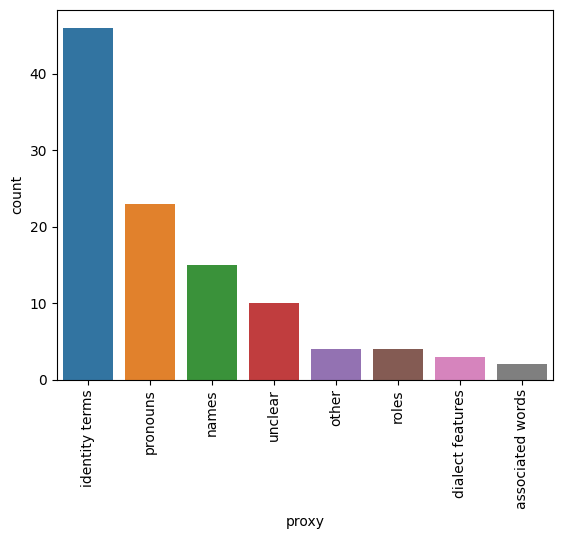

In [229]:
myplot = sns.barplot(data=proxy_types, x="proxy", y="count")
plt.xticks(rotation=90)

In [ ]:
# question, what percentage use only identity terms?

In [230]:
prompt_task = ["Sequence Scoring", "Single word generation", "Prompt continuation", "Full sentence response"]

In [231]:
res = []
for pt in prompt_task:
    x = Counter(df[pt].values)
    res.append(x['yes'])

In [232]:
prompts = pd.DataFrame.from_records(list(zip(prompt_task, res)), columns=["prompt_task", "count"])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Sequence Scoring'),
  Text(1, 0, 'Single word generation'),
  Text(2, 0, 'Prompt continuation'),
  Text(3, 0, 'Full sentence response')])

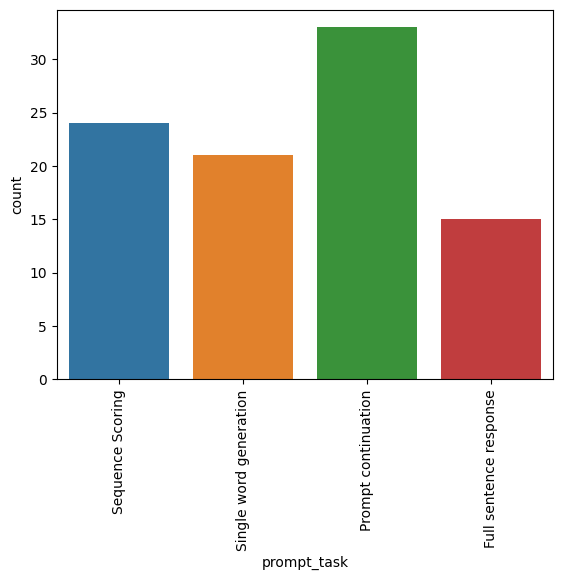

In [233]:
myplot = sns.barplot(data=prompts, x="prompt_task", y="count")
plt.xticks(rotation=90)

In [234]:
Counter(df["Fixed set"].values)

Counter({'no': 41, 'yes': 32, nan: 17})

In [235]:
context = ["Zero-shot/ few-shot task", "(Upstream) LM", "Dialogue", "Q&A"]

In [236]:
res = []
for i in context:
    x = Counter(df[i].values)
    res.append(x['yes'])

In [237]:
context_df = pd.DataFrame.from_records(list(zip(context, res)), columns=["context", "count"])

In [238]:
context_df

,context,count
0,Zero-shot/ few-shot task,10
1,(Upstream) LM,66
2,Dialogue,15
3,Q&A,3


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Zero-shot/ few-shot task'),
  Text(1, 0, '(Upstream) LM'),
  Text(2, 0, 'Dialogue'),
  Text(3, 0, 'Q&A')])

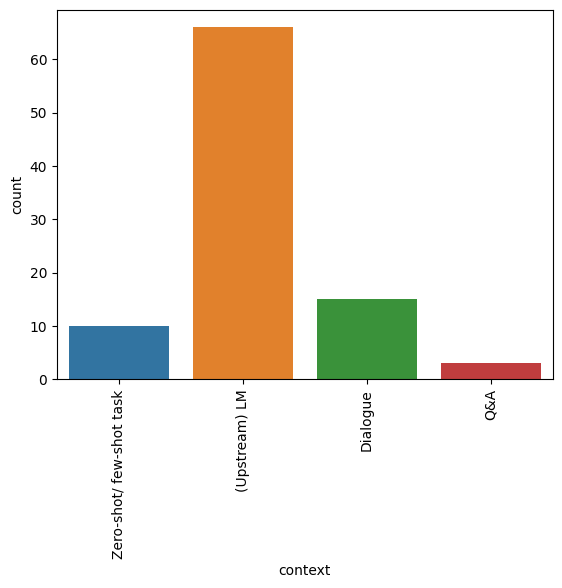

In [239]:
myplot = sns.barplot(data=context_df, x="context", y="count")
plt.xticks(rotation=90)

In [240]:
origin = ["Author", "Crowd-sourced", "Corpus", "Automatically Generated"]

In [241]:
res = []
for i in origin:
    x = Counter(df[i].values)
    res.append(x['yes'])

In [242]:
origin_df = pd.DataFrame.from_records(list(zip(origin, res)), columns=["test_origin", "count"])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Author'),
  Text(1, 0, 'Crowd-sourced'),
  Text(2, 0, 'Corpus'),
  Text(3, 0, 'Automatically Generated')])

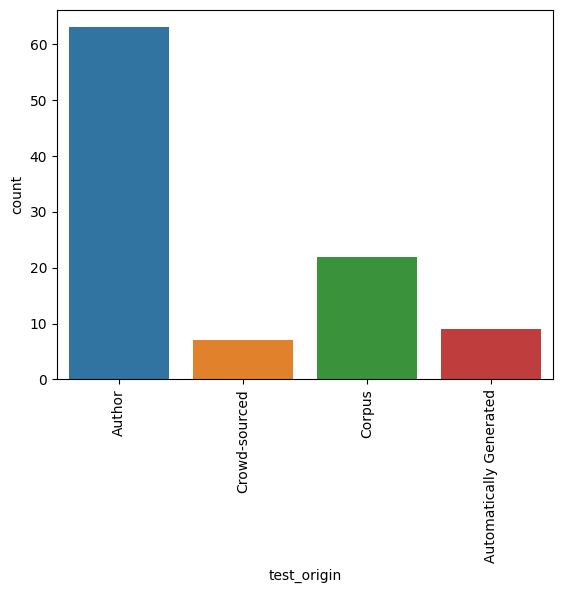

In [243]:
myplot = sns.barplot(data=origin_df, x="test_origin", y="count")
plt.xticks(rotation=90)

In [ ]:
# demographics, harm conceptualised, operationalisation

In [244]:
ops = ["Output content assessed", "Output quality assessed", "Difference in probability (ranking over fixed set)", "Most probable option or N options", "Difference in regard", "Difference in sentiment", "Difference in toxicity", "Difference in output distributions"]

In [245]:
res = []
for i in ops:
    x = Counter(df[i].values)
    res.append(x['yes'])

In [246]:
ops_df = pd.DataFrame.from_records(list(zip(ops, res)), columns=["operationalisation", "count"])

In [247]:
ops_df

,operationalisation,count
0,Output content assessed,54
1,Output quality assessed,19
2,Difference in probability (ranking over fixed ...,33
3,Most probable option or N options,20
4,Difference in regard,7
5,Difference in sentiment,24
6,Difference in toxicity,25
7,Difference in output distributions,8


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Output content assessed'),
  Text(1, 0, 'Output quality assessed'),
  Text(2, 0, 'Difference in probability (ranking over fixed set)'),
  Text(3, 0, 'Most probable option or N options'),
  Text(4, 0, 'Difference in regard'),
  Text(5, 0, 'Difference in sentiment'),
  Text(6, 0, 'Difference in toxicity'),
  Text(7, 0, 'Difference in output distributions')])

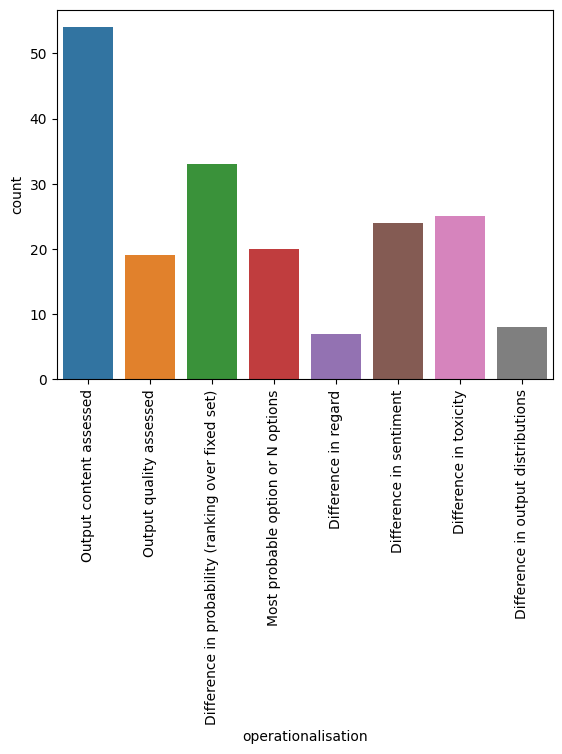

In [248]:
myplot = sns.barplot(data=ops_df, x="operationalisation", y="count")
plt.xticks(rotation=90)

In [261]:
outcome = ["No impact of demog term", "Neg. stereotype not in model", "No harmful output generated", "Other_Outcome", "Unclear_Outcome"]

In [263]:
res = []
for i in outcome:
    x = Counter([x for x in df[i].values if isinstance(x, str)])
    res.append(x['yes'])

In [264]:
outcome_df = pd.DataFrame.from_records(list(zip(outcome, res)), columns=["desired_outcome", "count"])

In [265]:
outcome_df

,desired_outcome,count
0,No impact of demog term,15
1,Neg. stereotype not in model,30
2,No harmful output generated,14
3,Other_Outcome,14
4,Unclear_Outcome,32


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'No impact of demog term'),
  Text(1, 0, 'Neg. stereotype not in model'),
  Text(2, 0, 'No harmful output generated'),
  Text(3, 0, 'Other_Outcome'),
  Text(4, 0, 'Unclear_Outcome')])

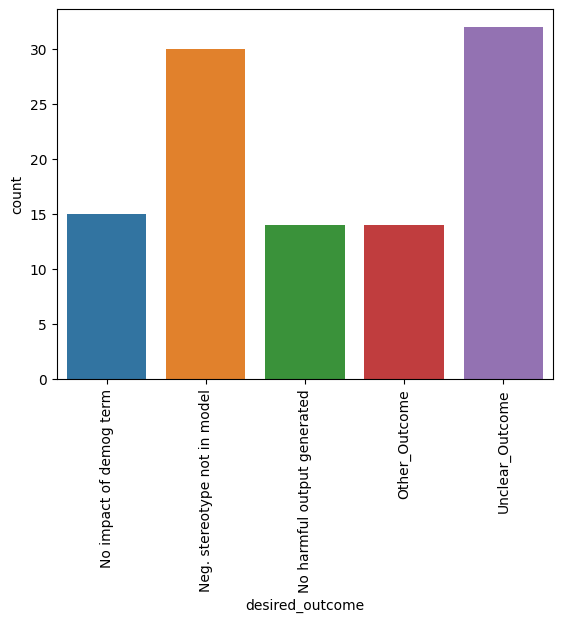

In [266]:
myplot = sns.barplot(data=outcome_df, x="desired_outcome", y="count")
plt.xticks(rotation=90)

In [267]:
harm = ["Stereotyping", "Toxic Content Generation", "Other_Harm", "Unclear_Harm"]

In [268]:
res = []
for i in harm:
    x = Counter([x for x in df[i].values if isinstance(x, str)])
    res.append(x['yes'])

In [269]:
harm_df = pd.DataFrame.from_records(list(zip(harm, res)), columns=["harm_concept", "count"])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Stereotyping'),
  Text(1, 0, 'Toxic Content Generation'),
  Text(2, 0, 'Other_Harm'),
  Text(3, 0, 'Unclear_Harm')])

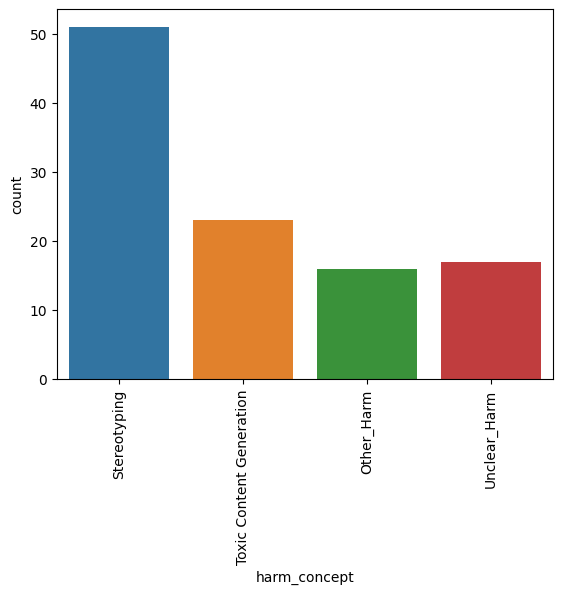

In [270]:
myplot = sns.barplot(data=harm_df, x="harm_concept", y="count")
plt.xticks(rotation=90)

In [273]:
demo = ["Gender", "Religion","Sexual Orientation", "Other_Demographic", "Ethnicity/race"]

In [275]:
res = []
for i in demo:
    x = Counter([x for x in df[i].values if isinstance(x, str)])
    res.append(x['yes'])
demo_df = pd.DataFrame.from_records(list(zip(demo, res)), columns=["demographic", "count"])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Religion'),
  Text(2, 0, 'Sexual Orientation'),
  Text(3, 0, 'Other_Demographic'),
  Text(4, 0, 'Ethnicity/race')])

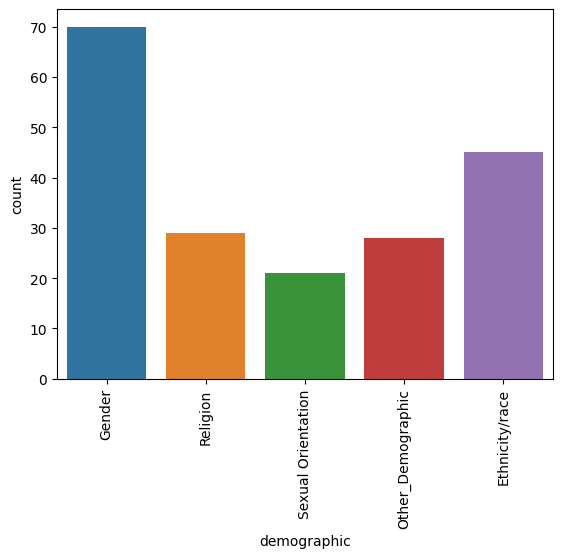

In [276]:
myplot = sns.barplot(data=demo_df, x="demographic", y="count")
plt.xticks(rotation=90)

In [272]:
df["Explicit Demographic Terms?"].str.count("yes").sum()/len(df["Explicit Demographic Terms?"])

0.5222222222222223